In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import keras
from keras.layers import Dense, Dropout, Input
from keras.models import Model, Sequential
from keras.datasets import mnist
from tqdm import tqdm
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import adam

Using TensorFlow backend.


In [6]:
#Function to load the data from the mnist module
def load_data():
  (x_train, y_train), (x_test, y_test) = mnist.load_data()
  x_train = (x_train.astype(np.float32) - 127.5)/127.5
  
  #We will now reshape x_train from 60000 X 28 X 28 to 60000 X 784
  x_train = x_train.reshape(60000, 784)
  return x_train, y_train, x_test, y_test

x_train, y_train, x_test, y_test = load_data()
print(x_train.shape)

11493376/11490434 [==============================] - 2s 0us/step
(60000, 784)


In [0]:
def adam_optimizer():
    return adam(lr=0.0002, beta_1=0.5)

In [11]:
#Building the generator model
def create_generator():
  generator = Sequential()
  generator.add(Dense(units = 256, input_dim = 100))
  generator.add(LeakyReLU(0.2))
  
  generator.add(Dense(units = 512))
  generator.add(LeakyReLU(0.2))
  
  generator.add(Dense(units = 1024))
  generator.add(LeakyReLU(0.2))
  
  generator.add(Dense(units = 784, activation = 'tanh'))
  generator.compile(loss = 'binary_crossentropy', optimizer = adam_optimizer())
  return generator

g = create_generator()
g.summary()



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 256)               25856     
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 1024)              525312    
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 1024)              0         
________________________

In [12]:
#Building the discriminator model
def create_discriminator():
  discriminator = Sequential()
  discriminator.add(Dense(units = 1024, input_dim = 784))
  discriminator.add(LeakyReLU(0.2))
  discriminator.add(Dropout(0.3))
  
  discriminator.add(Dense(units = 512))
  discriminator.add(LeakyReLU(0.2))
  discriminator.add(Dropout(0.3))
  
  discriminator.add(Dense(units = 256))
  discriminator.add(LeakyReLU(0.2))
  
  discriminator.add(Dense(units = 1, activation = 'sigmoid'))
  discriminator.compile(loss = 'binary_crossentropy', optimizer = adam_optimizer())
  return discriminator

d = create_discriminator()
d.summary()


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 1024)              803840    
_________________________________________________________________
leaky_re_lu_7 (LeakyReLU)    (None, 1024)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 512)               524800    
_________________________________________________________________
leaky_re_lu_8 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
____

In [13]:
#We will now create the GAN
#When training the G we will freeze the D
def create_gan(discriminator, generator):
  discriminator.trainable = False
  gan_input = Input(shape = (100,))
  x = generator(gan_input)
  gan_output = discriminator(x)
  gan = Model(inputs = gan_input, outputs = gan_output)
  gan.compile(loss = 'binary_crossentropy', optimizer = 'adam')
  return gan

gan = create_gan(d, g)
gan.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100)               0         
_________________________________________________________________
sequential_2 (Sequential)    (None, 784)               1486352   
_________________________________________________________________
sequential_3 (Sequential)    (None, 1)                 1460225   
Total params: 2,946,577
Trainable params: 1,486,352
Non-trainable params: 1,460,225
_________________________________________________________________


In [0]:
def plot_generated_images(epoch, generator, examples=100, dim=(10,10), figsize=(10,10)):
    noise= np.random.normal(loc=0, scale=1, size=[examples, 100])
    generated_images = generator.predict(noise)
    generated_images = generated_images.reshape(100,28,28)
    plt.figure(figsize=figsize)
    for i in range(generated_images.shape[0]):
        plt.subplot(dim[0], dim[1], i+1)
        plt.imshow(generated_images[i], interpolation='nearest')
        plt.axis('off')
    plt.tight_layout()
    plt.savefig('gan_generated_image %d.png' %epoch)

  0%|          | 0/128 [00:00<?, ?it/s]

Epoch 1


  5%|▌         | 7/128 [00:00<00:01, 61.42it/s]

Epoch 2


  6%|▋         | 8/128 [00:00<00:01, 74.25it/s]

Epoch 3


  5%|▌         | 7/128 [00:00<00:01, 69.81it/s]

Epoch 4


  5%|▌         | 7/128 [00:00<00:01, 68.25it/s]

Epoch 5


  6%|▋         | 8/128 [00:00<00:01, 71.17it/s]

Epoch 6


  6%|▋         | 8/128 [00:00<00:01, 72.80it/s]

Epoch 7


  5%|▌         | 7/128 [00:00<00:01, 66.70it/s]

Epoch 8


  6%|▋         | 8/128 [00:00<00:01, 70.21it/s]

Epoch 9


  5%|▌         | 7/128 [00:00<00:01, 65.21it/s]

Epoch 10


  6%|▋         | 8/128 [00:00<00:01, 75.23it/s]

Epoch 11


  6%|▋         | 8/128 [00:00<00:01, 73.51it/s]

Epoch 12


  6%|▋         | 8/128 [00:00<00:01, 72.44it/s]

Epoch 13


  6%|▋         | 8/128 [00:00<00:01, 72.55it/s]

Epoch 14


  5%|▌         | 7/128 [00:00<00:01, 69.41it/s]

Epoch 15


  6%|▋         | 8/128 [00:00<00:01, 76.10it/s]

Epoch 16


  6%|▋         | 8/128 [00:00<00:01, 70.97it/s]

Epoch 17


  6%|▋         | 8/128 [00:00<00:01, 74.32it/s]

Epoch 18


  5%|▌         | 7/128 [00:00<00:01, 67.14it/s]

Epoch 19


  5%|▌         | 7/128 [00:00<00:01, 68.92it/s]

Epoch 20


  5%|▌         | 7/128 [00:00<00:01, 65.24it/s]

Epoch 21


  5%|▌         | 7/128 [00:00<00:01, 68.45it/s]

Epoch 22


  6%|▋         | 8/128 [00:00<00:01, 73.76it/s]

Epoch 23


  6%|▋         | 8/128 [00:00<00:01, 71.01it/s]

Epoch 24


  5%|▌         | 7/128 [00:00<00:01, 69.82it/s]

Epoch 25


  5%|▌         | 7/128 [00:00<00:01, 69.26it/s]

Epoch 26


  6%|▋         | 8/128 [00:00<00:01, 76.40it/s]

Epoch 27


  6%|▋         | 8/128 [00:00<00:01, 72.12it/s]

Epoch 28


  6%|▋         | 8/128 [00:00<00:01, 73.45it/s]

Epoch 29


  6%|▋         | 8/128 [00:00<00:01, 72.19it/s]

Epoch 30


  5%|▌         | 7/128 [00:00<00:01, 62.38it/s]

Epoch 31


  6%|▋         | 8/128 [00:00<00:01, 72.61it/s]

Epoch 32


  5%|▌         | 7/128 [00:00<00:01, 69.49it/s]

Epoch 33


  6%|▋         | 8/128 [00:00<00:01, 71.65it/s]

Epoch 34


  5%|▌         | 7/128 [00:00<00:01, 68.96it/s]

Epoch 35


  5%|▌         | 7/128 [00:00<00:01, 69.06it/s]

Epoch 36


  6%|▋         | 8/128 [00:00<00:01, 71.91it/s]

Epoch 37


  6%|▋         | 8/128 [00:00<00:01, 75.66it/s]

Epoch 38


  6%|▋         | 8/128 [00:00<00:01, 73.51it/s]

Epoch 39


  6%|▋         | 8/128 [00:00<00:01, 70.86it/s]

Epoch 40


  5%|▌         | 7/128 [00:00<00:01, 64.71it/s]

Epoch 41


  6%|▋         | 8/128 [00:00<00:01, 70.57it/s]

Epoch 42


  6%|▋         | 8/128 [00:00<00:01, 73.62it/s]

Epoch 43


  6%|▋         | 8/128 [00:00<00:01, 68.98it/s]

Epoch 44


  5%|▌         | 7/128 [00:00<00:01, 69.38it/s]

Epoch 45


  5%|▌         | 7/128 [00:00<00:01, 69.90it/s]

Epoch 46


  6%|▋         | 8/128 [00:00<00:01, 69.80it/s]

Epoch 47


  6%|▋         | 8/128 [00:00<00:01, 72.52it/s]

Epoch 48


  6%|▋         | 8/128 [00:00<00:01, 70.05it/s]

Epoch 49


  5%|▌         | 7/128 [00:00<00:01, 67.68it/s]

Epoch 50


  6%|▋         | 8/128 [00:00<00:01, 74.86it/s]

Epoch 51


  6%|▋         | 8/128 [00:00<00:01, 71.85it/s]

Epoch 52


  5%|▌         | 7/128 [00:00<00:01, 68.69it/s]

Epoch 53


  5%|▌         | 7/128 [00:00<00:01, 69.88it/s]

Epoch 54


  6%|▋         | 8/128 [00:00<00:01, 74.46it/s]

Epoch 55


  6%|▋         | 8/128 [00:00<00:01, 73.46it/s]

Epoch 56


  6%|▋         | 8/128 [00:00<00:01, 71.60it/s]

Epoch 57


  6%|▋         | 8/128 [00:00<00:01, 73.44it/s]

Epoch 58


  6%|▋         | 8/128 [00:00<00:01, 71.22it/s]

Epoch 59


  6%|▋         | 8/128 [00:00<00:01, 74.44it/s]

Epoch 60


  5%|▌         | 7/128 [00:00<00:01, 65.79it/s]

Epoch 61


  6%|▋         | 8/128 [00:00<00:01, 77.03it/s]

Epoch 62


  6%|▋         | 8/128 [00:00<00:01, 73.26it/s]

Epoch 63


  6%|▋         | 8/128 [00:00<00:01, 75.27it/s]

Epoch 64


  6%|▋         | 8/128 [00:00<00:01, 72.69it/s]

Epoch 65


  6%|▋         | 8/128 [00:00<00:01, 73.92it/s]

Epoch 66


  5%|▌         | 7/128 [00:00<00:01, 69.66it/s]

Epoch 67


  6%|▋         | 8/128 [00:00<00:01, 73.92it/s]

Epoch 68


  6%|▋         | 8/128 [00:00<00:01, 76.79it/s]

Epoch 69


  6%|▋         | 8/128 [00:00<00:01, 73.51it/s]

Epoch 70


  6%|▋         | 8/128 [00:00<00:01, 75.20it/s]

Epoch 71


  6%|▋         | 8/128 [00:00<00:01, 72.06it/s]

Epoch 72


  6%|▋         | 8/128 [00:00<00:01, 74.81it/s]

Epoch 73


  6%|▋         | 8/128 [00:00<00:01, 73.98it/s]

Epoch 74


  5%|▌         | 7/128 [00:00<00:01, 69.63it/s]

Epoch 75


  5%|▌         | 7/128 [00:00<00:01, 66.60it/s]

Epoch 76


  6%|▋         | 8/128 [00:00<00:01, 72.73it/s]

Epoch 77


  6%|▋         | 8/128 [00:00<00:01, 72.86it/s]

Epoch 78


  6%|▋         | 8/128 [00:00<00:01, 75.65it/s]

Epoch 79


  6%|▋         | 8/128 [00:00<00:01, 72.79it/s]

Epoch 80


  5%|▌         | 7/128 [00:00<00:01, 63.36it/s]

Epoch 81


  6%|▋         | 8/128 [00:00<00:01, 70.67it/s]

Epoch 82


  6%|▋         | 8/128 [00:00<00:01, 76.81it/s]

Epoch 83


  6%|▋         | 8/128 [00:00<00:01, 76.67it/s]

Epoch 84


  6%|▋         | 8/128 [00:00<00:01, 73.50it/s]

Epoch 85


  5%|▌         | 7/128 [00:00<00:01, 68.98it/s]

Epoch 86


  6%|▋         | 8/128 [00:00<00:01, 74.55it/s]

Epoch 87


  6%|▋         | 8/128 [00:00<00:01, 75.17it/s]

Epoch 88


  6%|▋         | 8/128 [00:00<00:01, 72.80it/s]

Epoch 89


  6%|▋         | 8/128 [00:00<00:01, 72.30it/s]

Epoch 90


  6%|▋         | 8/128 [00:00<00:01, 71.98it/s]

Epoch 91


  6%|▋         | 8/128 [00:00<00:01, 73.00it/s]

Epoch 92


  6%|▋         | 8/128 [00:00<00:01, 72.60it/s]

Epoch 93


  5%|▌         | 7/128 [00:00<00:01, 66.60it/s]

Epoch 94


  6%|▋         | 8/128 [00:00<00:01, 72.53it/s]

Epoch 95


  6%|▋         | 8/128 [00:00<00:01, 72.78it/s]

Epoch 96


  6%|▋         | 8/128 [00:00<00:01, 74.59it/s]

Epoch 97


  6%|▋         | 8/128 [00:00<00:01, 77.53it/s]

Epoch 98


  6%|▋         | 8/128 [00:00<00:01, 76.52it/s]

Epoch 99


  6%|▋         | 8/128 [00:00<00:01, 78.02it/s]

Epoch 100


  5%|▌         | 7/128 [00:00<00:01, 63.69it/s]

Epoch 101


  6%|▋         | 8/128 [00:00<00:01, 72.25it/s]

Epoch 102


  6%|▋         | 8/128 [00:00<00:01, 73.71it/s]

Epoch 103


  6%|▋         | 8/128 [00:00<00:01, 77.28it/s]

Epoch 104


  6%|▋         | 8/128 [00:00<00:01, 74.47it/s]

Epoch 105


  6%|▋         | 8/128 [00:00<00:01, 71.83it/s]

Epoch 106


  6%|▋         | 8/128 [00:00<00:01, 75.11it/s]

Epoch 107


  6%|▋         | 8/128 [00:00<00:01, 71.53it/s]

Epoch 108


  6%|▋         | 8/128 [00:00<00:01, 75.66it/s]

Epoch 109


  5%|▌         | 7/128 [00:00<00:01, 69.19it/s]

Epoch 110


  6%|▋         | 8/128 [00:00<00:01, 77.17it/s]

Epoch 111


  6%|▋         | 8/128 [00:00<00:01, 74.17it/s]

Epoch 112


  6%|▋         | 8/128 [00:00<00:01, 73.32it/s]

Epoch 113


  6%|▋         | 8/128 [00:00<00:01, 77.75it/s]

Epoch 114


  6%|▋         | 8/128 [00:00<00:01, 72.56it/s]

Epoch 115


  6%|▋         | 8/128 [00:00<00:01, 76.11it/s]

Epoch 116


  6%|▋         | 8/128 [00:00<00:01, 76.25it/s]

Epoch 117


  6%|▋         | 8/128 [00:00<00:01, 78.65it/s]

Epoch 118


  6%|▋         | 8/128 [00:00<00:01, 75.52it/s]

Epoch 119


  5%|▌         | 7/128 [00:00<00:01, 67.58it/s]

Epoch 120


  5%|▌         | 7/128 [00:00<00:01, 66.74it/s]

Epoch 121


  6%|▋         | 8/128 [00:00<00:01, 77.51it/s]

Epoch 122


  5%|▌         | 7/128 [00:00<00:01, 67.06it/s]

Epoch 123


  6%|▋         | 8/128 [00:00<00:01, 66.65it/s]

Epoch 124


  6%|▋         | 8/128 [00:00<00:01, 76.47it/s]

Epoch 125


  6%|▋         | 8/128 [00:00<00:01, 76.51it/s]

Epoch 126


  6%|▋         | 8/128 [00:00<00:01, 74.51it/s]

Epoch 127


  6%|▋         | 8/128 [00:00<00:01, 75.45it/s]

Epoch 128


  6%|▋         | 8/128 [00:00<00:01, 74.59it/s]

Epoch 129


  6%|▋         | 8/128 [00:00<00:01, 70.77it/s]

Epoch 130


  5%|▌         | 7/128 [00:00<00:01, 68.57it/s]

Epoch 131


  6%|▋         | 8/128 [00:00<00:01, 72.14it/s]

Epoch 132


  6%|▋         | 8/128 [00:00<00:01, 76.03it/s]

Epoch 133


  6%|▋         | 8/128 [00:00<00:01, 71.36it/s]

Epoch 134


  6%|▋         | 8/128 [00:00<00:01, 74.40it/s]

Epoch 135


  6%|▋         | 8/128 [00:00<00:01, 74.20it/s]

Epoch 136


  6%|▋         | 8/128 [00:00<00:01, 77.30it/s]

Epoch 137


  6%|▋         | 8/128 [00:00<00:01, 72.90it/s]

Epoch 138


  6%|▋         | 8/128 [00:00<00:01, 73.79it/s]

Epoch 139


  6%|▋         | 8/128 [00:00<00:01, 76.72it/s]

Epoch 140


  5%|▌         | 7/128 [00:00<00:01, 65.50it/s]

Epoch 141


  6%|▋         | 8/128 [00:00<00:01, 72.91it/s]

Epoch 142


  5%|▌         | 7/128 [00:00<00:01, 69.51it/s]

Epoch 143


  6%|▋         | 8/128 [00:00<00:01, 75.78it/s]

Epoch 144


  6%|▋         | 8/128 [00:00<00:01, 75.29it/s]

Epoch 145


  6%|▋         | 8/128 [00:00<00:01, 75.80it/s]

Epoch 146


  6%|▋         | 8/128 [00:00<00:01, 73.06it/s]

Epoch 147


  6%|▋         | 8/128 [00:00<00:01, 71.18it/s]

Epoch 148


  6%|▋         | 8/128 [00:00<00:01, 75.15it/s]

Epoch 149


  6%|▋         | 8/128 [00:00<00:01, 76.27it/s]

Epoch 150


  6%|▋         | 8/128 [00:00<00:01, 73.25it/s]

Epoch 151


  6%|▋         | 8/128 [00:00<00:01, 74.01it/s]

Epoch 152


  6%|▋         | 8/128 [00:00<00:01, 74.24it/s]

Epoch 153


  6%|▋         | 8/128 [00:00<00:01, 75.60it/s]

Epoch 154


  6%|▋         | 8/128 [00:00<00:01, 79.73it/s]

Epoch 155


  5%|▌         | 7/128 [00:00<00:01, 69.17it/s]

Epoch 156


  6%|▋         | 8/128 [00:00<00:01, 76.82it/s]

Epoch 157


  6%|▋         | 8/128 [00:00<00:01, 72.47it/s]

Epoch 158


  6%|▋         | 8/128 [00:00<00:01, 75.91it/s]

Epoch 159


  6%|▋         | 8/128 [00:00<00:01, 73.66it/s]

Epoch 160


  5%|▌         | 7/128 [00:00<00:01, 61.74it/s]

Epoch 161


  6%|▋         | 8/128 [00:00<00:01, 74.12it/s]

Epoch 162


  6%|▋         | 8/128 [00:00<00:01, 74.76it/s]

Epoch 163


  6%|▋         | 8/128 [00:00<00:01, 73.10it/s]

Epoch 164


  5%|▌         | 7/128 [00:00<00:01, 69.79it/s]

Epoch 165


  6%|▋         | 8/128 [00:00<00:01, 71.56it/s]

Epoch 166


  6%|▋         | 8/128 [00:00<00:01, 76.91it/s]

Epoch 167


  6%|▋         | 8/128 [00:00<00:01, 76.66it/s]

Epoch 168


  6%|▋         | 8/128 [00:00<00:01, 76.34it/s]

Epoch 169


  6%|▋         | 8/128 [00:00<00:01, 74.76it/s]

Epoch 170


  6%|▋         | 8/128 [00:00<00:01, 79.45it/s]

Epoch 171


  5%|▌         | 7/128 [00:00<00:01, 68.50it/s]

Epoch 172


  6%|▋         | 8/128 [00:00<00:01, 73.41it/s]

Epoch 173


  6%|▋         | 8/128 [00:00<00:01, 75.31it/s]

Epoch 174


  6%|▋         | 8/128 [00:00<00:01, 73.39it/s]

Epoch 175


  6%|▋         | 8/128 [00:00<00:01, 74.07it/s]

Epoch 176


  6%|▋         | 8/128 [00:00<00:01, 74.38it/s]

Epoch 177


  6%|▋         | 8/128 [00:00<00:01, 74.48it/s]

Epoch 178


  5%|▌         | 7/128 [00:00<00:01, 68.63it/s]

Epoch 179


  6%|▋         | 8/128 [00:00<00:01, 74.96it/s]

Epoch 180


  5%|▌         | 7/128 [00:00<00:01, 66.69it/s]

Epoch 181


  6%|▋         | 8/128 [00:00<00:01, 77.30it/s]

Epoch 182


  6%|▋         | 8/128 [00:00<00:01, 72.72it/s]

Epoch 183


  6%|▋         | 8/128 [00:00<00:01, 74.61it/s]

Epoch 184


  6%|▋         | 8/128 [00:00<00:01, 77.41it/s]

Epoch 185


  6%|▋         | 8/128 [00:00<00:01, 72.11it/s]

Epoch 186


  6%|▋         | 8/128 [00:00<00:01, 78.11it/s]

Epoch 187


  6%|▋         | 8/128 [00:00<00:01, 76.69it/s]

Epoch 188


  6%|▋         | 8/128 [00:00<00:01, 76.28it/s]

Epoch 189


  6%|▋         | 8/128 [00:00<00:01, 76.93it/s]

Epoch 190


  6%|▋         | 8/128 [00:00<00:01, 76.78it/s]

Epoch 191


  6%|▋         | 8/128 [00:00<00:01, 73.30it/s]

Epoch 192


  5%|▌         | 7/128 [00:00<00:01, 69.49it/s]

Epoch 193


  6%|▋         | 8/128 [00:00<00:01, 78.84it/s]

Epoch 194


  6%|▋         | 8/128 [00:00<00:01, 74.82it/s]

Epoch 195


  6%|▋         | 8/128 [00:00<00:01, 74.53it/s]

Epoch 196


  6%|▋         | 8/128 [00:00<00:01, 75.99it/s]

Epoch 197


  6%|▋         | 8/128 [00:00<00:01, 74.12it/s]

Epoch 198


  6%|▋         | 8/128 [00:00<00:01, 74.17it/s]

Epoch 199


  6%|▋         | 8/128 [00:00<00:01, 73.54it/s]

Epoch 200


  5%|▌         | 7/128 [00:00<00:01, 61.24it/s]

Epoch 201


  6%|▋         | 8/128 [00:00<00:01, 76.81it/s]

Epoch 202


  6%|▋         | 8/128 [00:00<00:01, 75.69it/s]

Epoch 203


  6%|▋         | 8/128 [00:00<00:01, 76.06it/s]

Epoch 204


  6%|▋         | 8/128 [00:00<00:01, 78.60it/s]

Epoch 205


  6%|▋         | 8/128 [00:00<00:01, 74.80it/s]

Epoch 206


  6%|▋         | 8/128 [00:00<00:01, 75.61it/s]

Epoch 207


  6%|▋         | 8/128 [00:00<00:01, 71.99it/s]

Epoch 208


  6%|▋         | 8/128 [00:00<00:01, 71.28it/s]

Epoch 209


  6%|▋         | 8/128 [00:00<00:01, 73.72it/s]

Epoch 210


  6%|▋         | 8/128 [00:00<00:01, 76.63it/s]

Epoch 211


  6%|▋         | 8/128 [00:00<00:01, 74.94it/s]

Epoch 212


  6%|▋         | 8/128 [00:00<00:01, 72.36it/s]

Epoch 213


  6%|▋         | 8/128 [00:00<00:01, 77.38it/s]

Epoch 214


  6%|▋         | 8/128 [00:00<00:01, 70.16it/s]

Epoch 215


  6%|▋         | 8/128 [00:00<00:01, 76.55it/s]

Epoch 216


  6%|▋         | 8/128 [00:00<00:01, 76.37it/s]

Epoch 217


  5%|▌         | 7/128 [00:00<00:01, 68.62it/s]

Epoch 218


  6%|▋         | 8/128 [00:00<00:01, 76.41it/s]

Epoch 219


  6%|▋         | 8/128 [00:00<00:01, 70.32it/s]

Epoch 220


  5%|▌         | 7/128 [00:00<00:01, 66.50it/s]

Epoch 221


  6%|▋         | 8/128 [00:00<00:01, 75.35it/s]

Epoch 222


  6%|▋         | 8/128 [00:00<00:01, 77.79it/s]

Epoch 223


  6%|▋         | 8/128 [00:00<00:01, 75.57it/s]

Epoch 224


  6%|▋         | 8/128 [00:00<00:01, 71.18it/s]

Epoch 225


  5%|▌         | 7/128 [00:00<00:01, 69.36it/s]

Epoch 226


  6%|▋         | 8/128 [00:00<00:01, 73.06it/s]

Epoch 227


  6%|▋         | 8/128 [00:00<00:01, 74.81it/s]

Epoch 228


  6%|▋         | 8/128 [00:00<00:01, 72.54it/s]

Epoch 229


  6%|▋         | 8/128 [00:00<00:01, 75.28it/s]

Epoch 230


  6%|▋         | 8/128 [00:00<00:01, 78.37it/s]

Epoch 231


  6%|▋         | 8/128 [00:00<00:01, 76.69it/s]

Epoch 232


  6%|▋         | 8/128 [00:00<00:01, 75.39it/s]

Epoch 233


  6%|▋         | 8/128 [00:00<00:01, 73.87it/s]

Epoch 234


  6%|▋         | 8/128 [00:00<00:01, 74.54it/s]

Epoch 235


  7%|▋         | 9/128 [00:00<00:01, 78.00it/s]

Epoch 236


  6%|▋         | 8/128 [00:00<00:01, 77.53it/s]

Epoch 237


  6%|▋         | 8/128 [00:00<00:01, 77.45it/s]

Epoch 238


  6%|▋         | 8/128 [00:00<00:01, 71.16it/s]

Epoch 239


  6%|▋         | 8/128 [00:00<00:01, 76.62it/s]

Epoch 240


  5%|▌         | 7/128 [00:00<00:01, 68.87it/s]

Epoch 241


  6%|▋         | 8/128 [00:00<00:01, 76.91it/s]

Epoch 242


  6%|▋         | 8/128 [00:00<00:01, 77.42it/s]

Epoch 243


  6%|▋         | 8/128 [00:00<00:01, 76.56it/s]

Epoch 244


  6%|▋         | 8/128 [00:00<00:01, 72.80it/s]

Epoch 245


  6%|▋         | 8/128 [00:00<00:01, 76.99it/s]

Epoch 246


  6%|▋         | 8/128 [00:00<00:01, 71.34it/s]

Epoch 247


  6%|▋         | 8/128 [00:00<00:01, 74.90it/s]

Epoch 248


  6%|▋         | 8/128 [00:00<00:01, 76.22it/s]

Epoch 249


  6%|▋         | 8/128 [00:00<00:01, 76.35it/s]

Epoch 250


  6%|▋         | 8/128 [00:00<00:01, 73.12it/s]

Epoch 251


  6%|▋         | 8/128 [00:00<00:01, 75.57it/s]

Epoch 252


  6%|▋         | 8/128 [00:00<00:01, 78.47it/s]

Epoch 253


  5%|▌         | 7/128 [00:00<00:01, 69.73it/s]

Epoch 254


  6%|▋         | 8/128 [00:00<00:01, 74.10it/s]

Epoch 255


  6%|▋         | 8/128 [00:00<00:01, 76.84it/s]

Epoch 256


  6%|▋         | 8/128 [00:00<00:01, 71.88it/s]

Epoch 257


  6%|▋         | 8/128 [00:00<00:01, 72.83it/s]

Epoch 258


  6%|▋         | 8/128 [00:00<00:01, 76.74it/s]

Epoch 259


  6%|▋         | 8/128 [00:00<00:01, 74.40it/s]

Epoch 260


  5%|▌         | 7/128 [00:00<00:01, 65.25it/s]

Epoch 261


  6%|▋         | 8/128 [00:00<00:01, 75.67it/s]

Epoch 262


  6%|▋         | 8/128 [00:00<00:01, 75.42it/s]

Epoch 263


  5%|▌         | 7/128 [00:00<00:01, 68.21it/s]

Epoch 264


  6%|▋         | 8/128 [00:00<00:01, 73.74it/s]

Epoch 265


  6%|▋         | 8/128 [00:00<00:01, 77.03it/s]

Epoch 266


  6%|▋         | 8/128 [00:00<00:01, 75.83it/s]

Epoch 267


  6%|▋         | 8/128 [00:00<00:01, 70.00it/s]

Epoch 268


  6%|▋         | 8/128 [00:00<00:01, 74.69it/s]

Epoch 269


  6%|▋         | 8/128 [00:00<00:01, 72.97it/s]

Epoch 270


  6%|▋         | 8/128 [00:00<00:01, 71.44it/s]

Epoch 271


  6%|▋         | 8/128 [00:00<00:01, 72.57it/s]

Epoch 272


  6%|▋         | 8/128 [00:00<00:01, 75.60it/s]

Epoch 273


  6%|▋         | 8/128 [00:00<00:01, 76.81it/s]

Epoch 274


  6%|▋         | 8/128 [00:00<00:01, 73.32it/s]

Epoch 275


  6%|▋         | 8/128 [00:00<00:01, 75.00it/s]

Epoch 276


  6%|▋         | 8/128 [00:00<00:01, 72.59it/s]

Epoch 277


  6%|▋         | 8/128 [00:00<00:01, 70.94it/s]

Epoch 278


  6%|▋         | 8/128 [00:00<00:01, 73.42it/s]

Epoch 279


  6%|▋         | 8/128 [00:00<00:01, 75.58it/s]

Epoch 280


  5%|▌         | 7/128 [00:00<00:01, 66.59it/s]

Epoch 281


  6%|▋         | 8/128 [00:00<00:01, 73.79it/s]

Epoch 282


  5%|▌         | 7/128 [00:00<00:01, 67.39it/s]

Epoch 283


  6%|▋         | 8/128 [00:00<00:01, 76.44it/s]

Epoch 284


  6%|▋         | 8/128 [00:00<00:01, 72.43it/s]

Epoch 285


  6%|▋         | 8/128 [00:00<00:01, 76.35it/s]

Epoch 286


  6%|▋         | 8/128 [00:00<00:01, 75.29it/s]

Epoch 287


  6%|▋         | 8/128 [00:00<00:01, 77.82it/s]

Epoch 288


  5%|▌         | 7/128 [00:00<00:01, 67.43it/s]

Epoch 289


  6%|▋         | 8/128 [00:00<00:01, 76.45it/s]

Epoch 290


  6%|▋         | 8/128 [00:00<00:01, 72.85it/s]

Epoch 291


  5%|▌         | 7/128 [00:00<00:01, 68.09it/s]

Epoch 292


  5%|▌         | 7/128 [00:00<00:01, 69.88it/s]

Epoch 293


  6%|▋         | 8/128 [00:00<00:01, 72.47it/s]

Epoch 294


  6%|▋         | 8/128 [00:00<00:01, 73.99it/s]

Epoch 295


  6%|▋         | 8/128 [00:00<00:01, 74.88it/s]

Epoch 296


  5%|▌         | 7/128 [00:00<00:01, 69.56it/s]

Epoch 297


  6%|▋         | 8/128 [00:00<00:01, 72.34it/s]

Epoch 298


  6%|▋         | 8/128 [00:00<00:01, 71.13it/s]

Epoch 299


  6%|▋         | 8/128 [00:00<00:01, 76.79it/s]

Epoch 300


  5%|▌         | 7/128 [00:00<00:01, 68.71it/s]

Epoch 301


  6%|▋         | 8/128 [00:00<00:01, 74.22it/s]

Epoch 302


  6%|▋         | 8/128 [00:00<00:01, 75.10it/s]

Epoch 303


  6%|▋         | 8/128 [00:00<00:01, 74.14it/s]

Epoch 304


  6%|▋         | 8/128 [00:00<00:01, 75.55it/s]

Epoch 305


  6%|▋         | 8/128 [00:00<00:01, 71.66it/s]

Epoch 306


  6%|▋         | 8/128 [00:00<00:01, 71.35it/s]

Epoch 307


  5%|▌         | 7/128 [00:00<00:01, 69.76it/s]

Epoch 308


  6%|▋         | 8/128 [00:00<00:01, 72.16it/s]

Epoch 309


  6%|▋         | 8/128 [00:00<00:01, 71.69it/s]

Epoch 310


  6%|▋         | 8/128 [00:00<00:01, 72.59it/s]

Epoch 311


  5%|▌         | 7/128 [00:00<00:01, 68.24it/s]

Epoch 312


  6%|▋         | 8/128 [00:00<00:01, 71.78it/s]

Epoch 313


  6%|▋         | 8/128 [00:00<00:01, 70.65it/s]

Epoch 314


  6%|▋         | 8/128 [00:00<00:01, 74.37it/s]

Epoch 315


  5%|▌         | 7/128 [00:00<00:01, 69.69it/s]

Epoch 316


  6%|▋         | 8/128 [00:00<00:01, 75.05it/s]

Epoch 317


  6%|▋         | 8/128 [00:00<00:01, 71.52it/s]

Epoch 318


  6%|▋         | 8/128 [00:00<00:01, 73.71it/s]

Epoch 319


  5%|▌         | 7/128 [00:00<00:01, 69.54it/s]

Epoch 320


  5%|▌         | 7/128 [00:00<00:01, 65.22it/s]

Epoch 321


  5%|▌         | 7/128 [00:00<00:01, 69.30it/s]

Epoch 322


  6%|▋         | 8/128 [00:00<00:01, 71.47it/s]

Epoch 323


  5%|▌         | 7/128 [00:00<00:01, 69.71it/s]

Epoch 324


  6%|▋         | 8/128 [00:00<00:01, 73.72it/s]

Epoch 325


  6%|▋         | 8/128 [00:00<00:01, 73.96it/s]

Epoch 326


  6%|▋         | 8/128 [00:00<00:01, 72.62it/s]

Epoch 327


  5%|▌         | 7/128 [00:00<00:01, 69.37it/s]

Epoch 328


  6%|▋         | 8/128 [00:00<00:01, 71.93it/s]

Epoch 329


  6%|▋         | 8/128 [00:00<00:01, 75.28it/s]

Epoch 330


  6%|▋         | 8/128 [00:00<00:01, 75.86it/s]

Epoch 331


  6%|▋         | 8/128 [00:00<00:01, 76.96it/s]

Epoch 332


  6%|▋         | 8/128 [00:00<00:01, 73.21it/s]

Epoch 333


  6%|▋         | 8/128 [00:00<00:01, 72.30it/s]

Epoch 334


  6%|▋         | 8/128 [00:00<00:01, 72.51it/s]

Epoch 335


  6%|▋         | 8/128 [00:00<00:01, 72.19it/s]

Epoch 336


  6%|▋         | 8/128 [00:00<00:01, 72.93it/s]

Epoch 337


  6%|▋         | 8/128 [00:00<00:01, 71.89it/s]

Epoch 338


  6%|▋         | 8/128 [00:00<00:01, 71.00it/s]

Epoch 339


  6%|▋         | 8/128 [00:00<00:01, 76.35it/s]

Epoch 340


  5%|▌         | 7/128 [00:00<00:01, 63.91it/s]

Epoch 341


  6%|▋         | 8/128 [00:00<00:01, 72.14it/s]

Epoch 342


  6%|▋         | 8/128 [00:00<00:01, 71.14it/s]

Epoch 343


  6%|▋         | 8/128 [00:00<00:01, 71.97it/s]

Epoch 344


  6%|▋         | 8/128 [00:00<00:01, 73.03it/s]

Epoch 345


  6%|▋         | 8/128 [00:00<00:01, 74.29it/s]

Epoch 346


  6%|▋         | 8/128 [00:00<00:01, 75.00it/s]

Epoch 347


  6%|▋         | 8/128 [00:00<00:01, 74.79it/s]

Epoch 348


  6%|▋         | 8/128 [00:00<00:01, 74.53it/s]

Epoch 349


  6%|▋         | 8/128 [00:00<00:01, 71.01it/s]

Epoch 350


  6%|▋         | 8/128 [00:00<00:01, 77.52it/s]

Epoch 351


  6%|▋         | 8/128 [00:00<00:01, 76.40it/s]

Epoch 352


  6%|▋         | 8/128 [00:00<00:01, 72.39it/s]

Epoch 353


  6%|▋         | 8/128 [00:00<00:01, 75.75it/s]

Epoch 354


  6%|▋         | 8/128 [00:00<00:01, 78.94it/s]

Epoch 355


  6%|▋         | 8/128 [00:00<00:01, 75.44it/s]

Epoch 356


  6%|▋         | 8/128 [00:00<00:01, 76.00it/s]

Epoch 357


  6%|▋         | 8/128 [00:00<00:01, 73.45it/s]

Epoch 358


  6%|▋         | 8/128 [00:00<00:01, 75.71it/s]

Epoch 359


  5%|▌         | 7/128 [00:00<00:01, 68.07it/s]

Epoch 360


  5%|▌         | 7/128 [00:00<00:01, 62.36it/s]

Epoch 361


  5%|▌         | 7/128 [00:00<00:01, 67.06it/s]

Epoch 362


  6%|▋         | 8/128 [00:00<00:01, 78.17it/s]

Epoch 363


  6%|▋         | 8/128 [00:00<00:01, 76.36it/s]

Epoch 364


  6%|▋         | 8/128 [00:00<00:01, 75.26it/s]

Epoch 365


  6%|▋         | 8/128 [00:00<00:01, 78.16it/s]

Epoch 366


  6%|▋         | 8/128 [00:00<00:01, 76.43it/s]

Epoch 367


  6%|▋         | 8/128 [00:00<00:01, 75.48it/s]

Epoch 368


  6%|▋         | 8/128 [00:00<00:01, 72.85it/s]

Epoch 369


  6%|▋         | 8/128 [00:00<00:01, 76.54it/s]

Epoch 370


  6%|▋         | 8/128 [00:00<00:01, 72.42it/s]

Epoch 371


  6%|▋         | 8/128 [00:00<00:01, 73.83it/s]

Epoch 372


  6%|▋         | 8/128 [00:00<00:01, 73.92it/s]

Epoch 373


  6%|▋         | 8/128 [00:00<00:01, 75.99it/s]

Epoch 374


  6%|▋         | 8/128 [00:00<00:01, 76.56it/s]

Epoch 375


  6%|▋         | 8/128 [00:00<00:01, 72.37it/s]

Epoch 376


  6%|▋         | 8/128 [00:00<00:01, 76.04it/s]

Epoch 377


  5%|▌         | 7/128 [00:00<00:01, 61.78it/s]

Epoch 378


  5%|▌         | 7/128 [00:00<00:01, 67.60it/s]

Epoch 379


  6%|▋         | 8/128 [00:00<00:01, 74.03it/s]

Epoch 380


  5%|▌         | 7/128 [00:00<00:01, 64.67it/s]

Epoch 381


  6%|▋         | 8/128 [00:00<00:01, 76.04it/s]

Epoch 382


  6%|▋         | 8/128 [00:00<00:01, 73.82it/s]

Epoch 383


  6%|▋         | 8/128 [00:00<00:01, 72.23it/s]

Epoch 384


  6%|▋         | 8/128 [00:00<00:01, 74.85it/s]

Epoch 385


  6%|▋         | 8/128 [00:00<00:01, 72.57it/s]

Epoch 386


  6%|▋         | 8/128 [00:00<00:01, 71.87it/s]

Epoch 387


  6%|▋         | 8/128 [00:00<00:01, 72.33it/s]

Epoch 388


  6%|▋         | 8/128 [00:00<00:01, 70.88it/s]

Epoch 389


  5%|▌         | 7/128 [00:00<00:01, 69.14it/s]

Epoch 390


  6%|▋         | 8/128 [00:00<00:01, 73.54it/s]

Epoch 391


  5%|▌         | 7/128 [00:00<00:01, 69.55it/s]

Epoch 392


  6%|▋         | 8/128 [00:00<00:01, 71.84it/s]

Epoch 393


  6%|▋         | 8/128 [00:00<00:01, 72.19it/s]

Epoch 394


  6%|▋         | 8/128 [00:00<00:01, 73.93it/s]

Epoch 395


  6%|▋         | 8/128 [00:00<00:01, 75.11it/s]

Epoch 396


  6%|▋         | 8/128 [00:00<00:01, 78.43it/s]

Epoch 397


  6%|▋         | 8/128 [00:00<00:01, 75.08it/s]

Epoch 398


  6%|▋         | 8/128 [00:00<00:01, 71.35it/s]

Epoch 399


  6%|▋         | 8/128 [00:00<00:01, 76.65it/s]

Epoch 400


100%|██████████| 128/128 [00:01<00:00, 72.43it/s]
/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


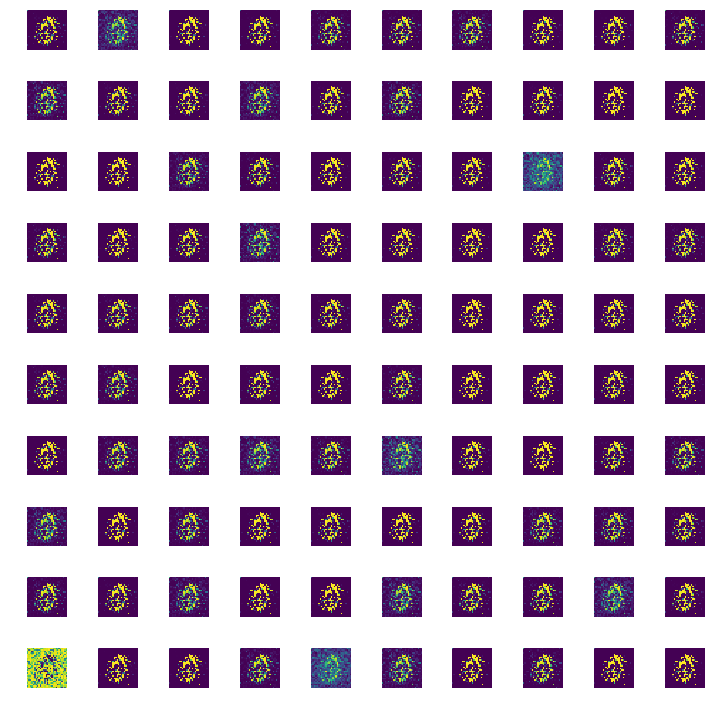

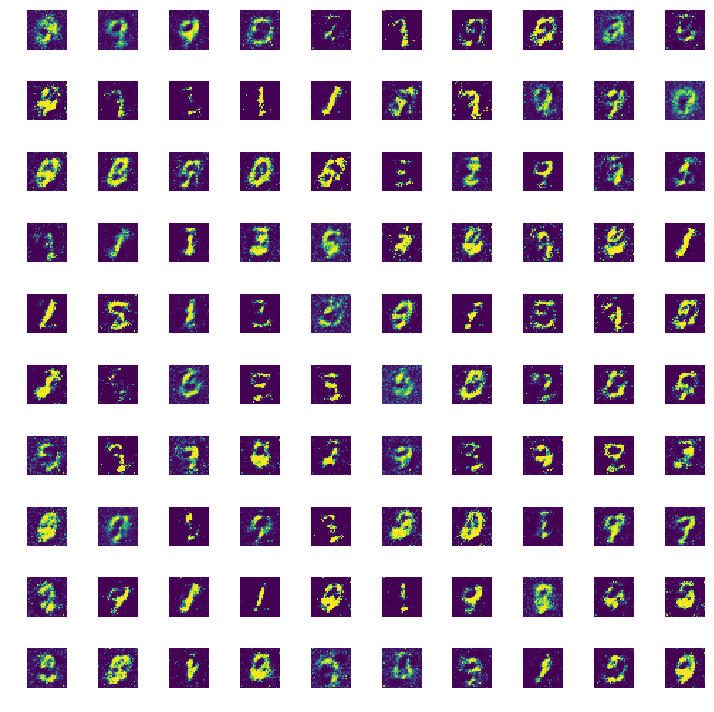

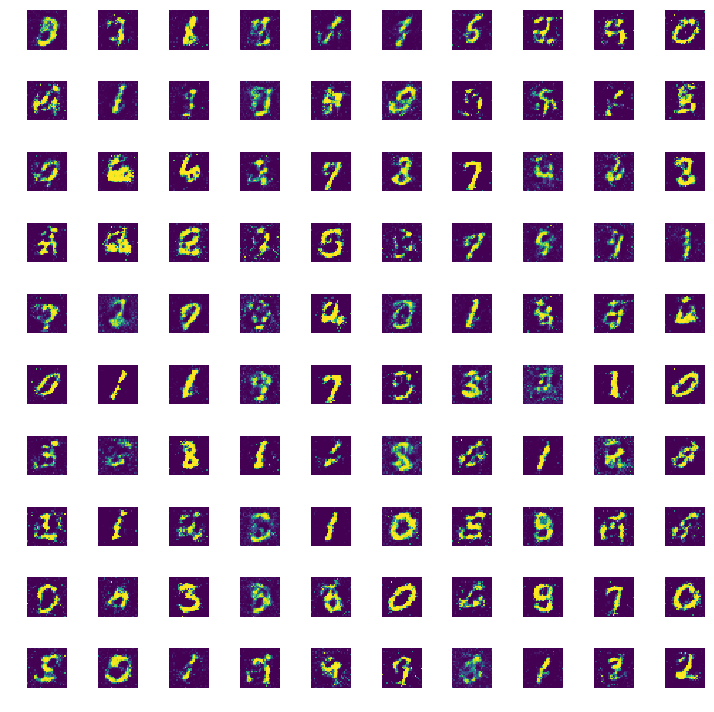

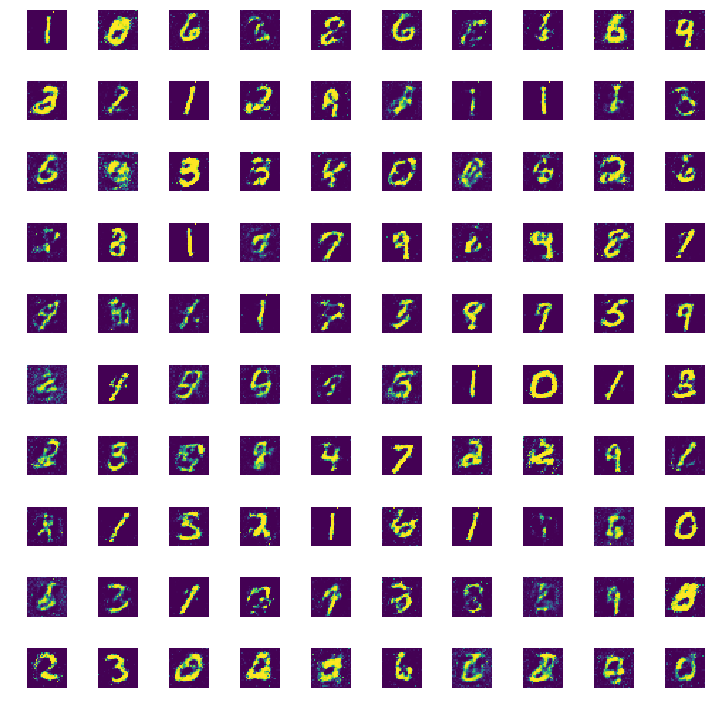

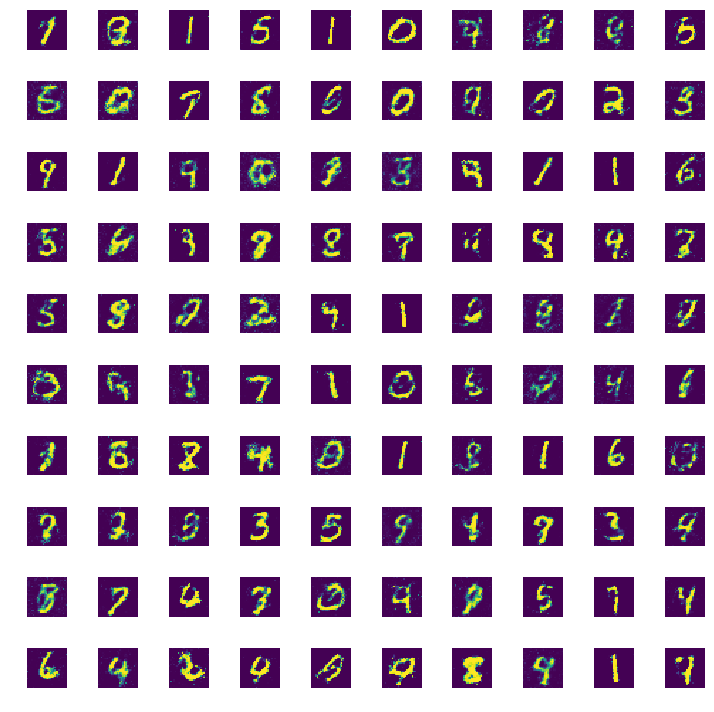

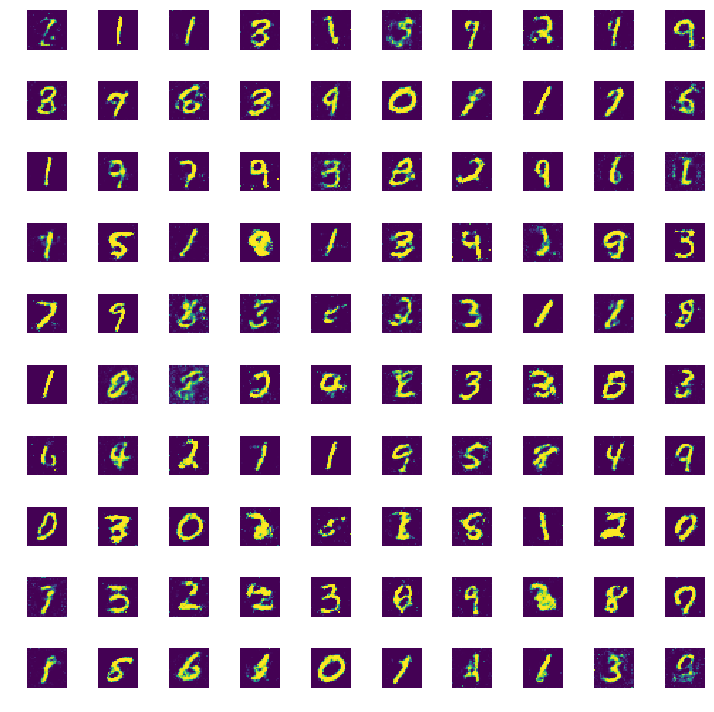

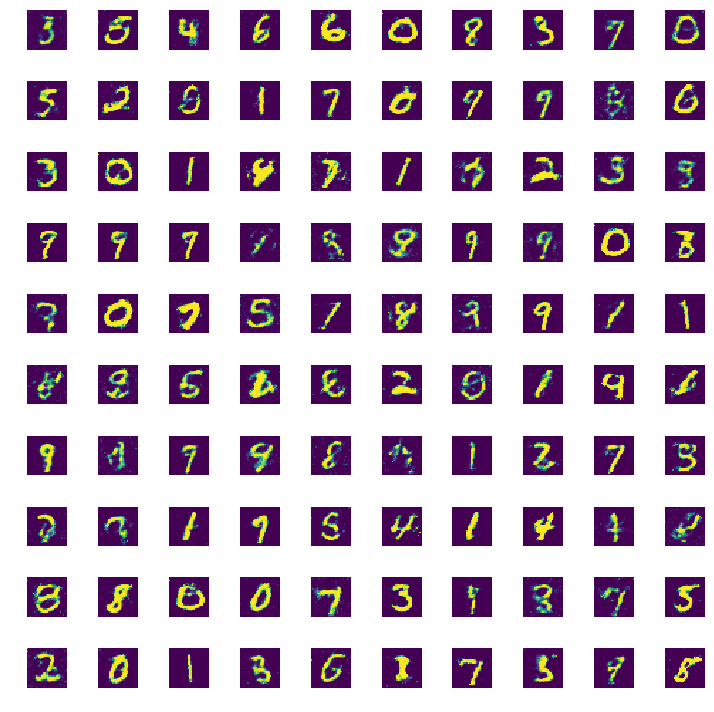

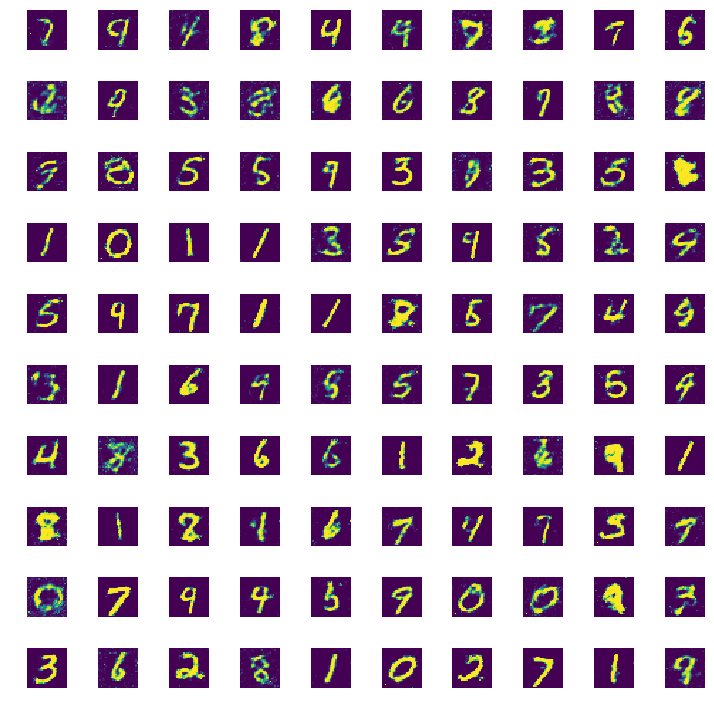

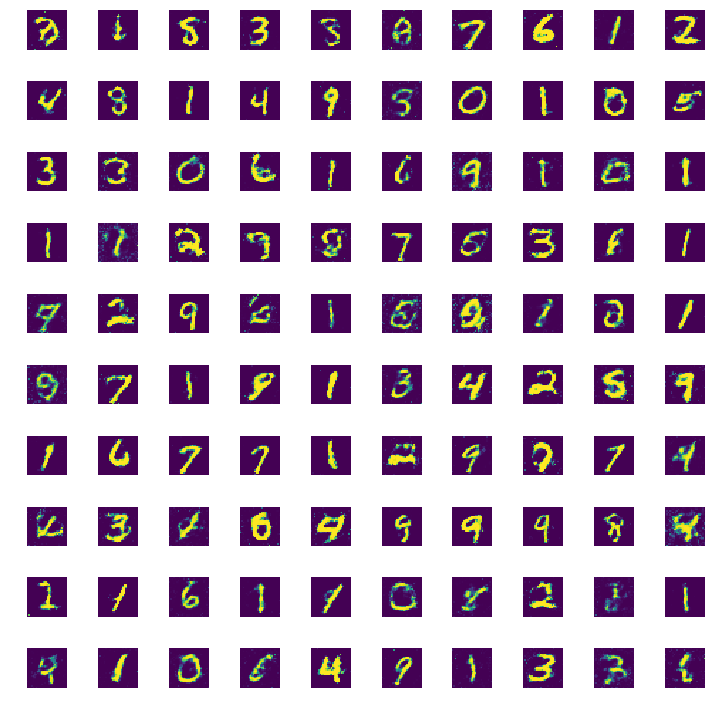

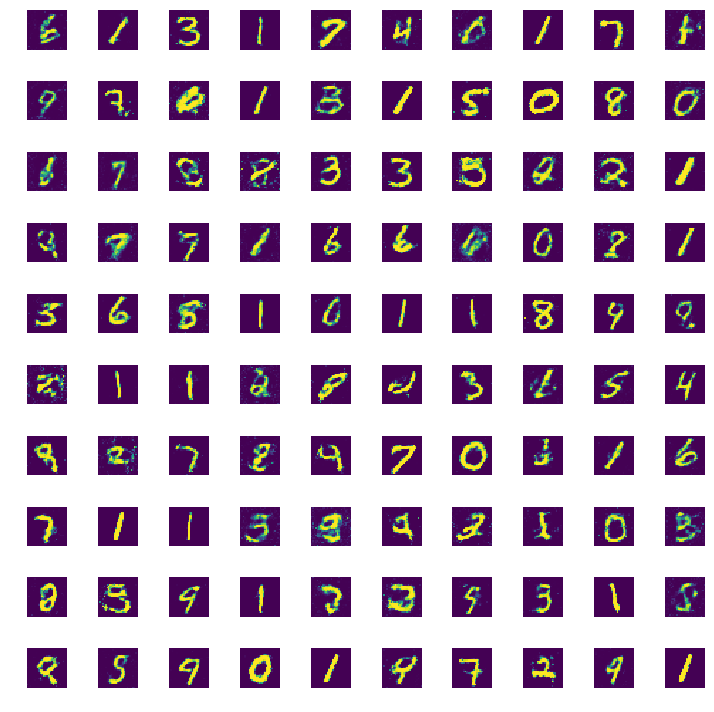

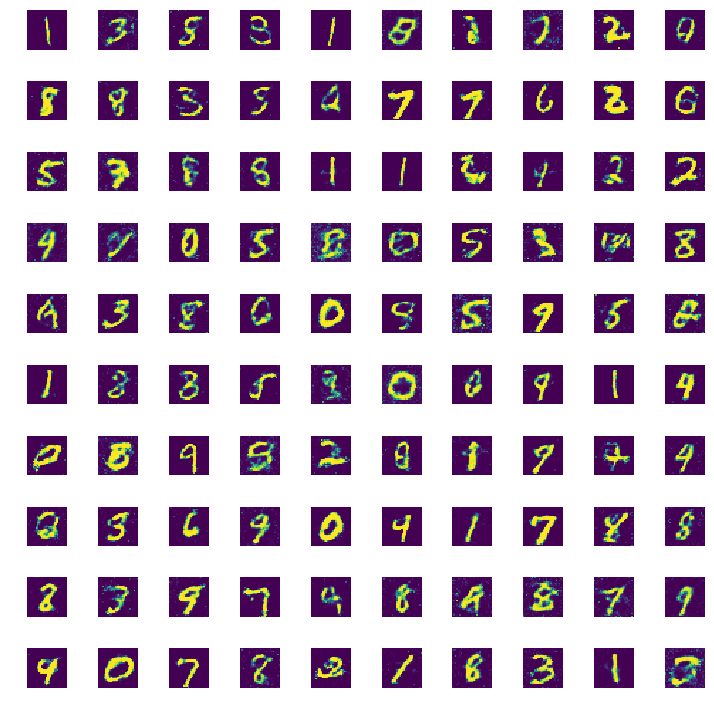

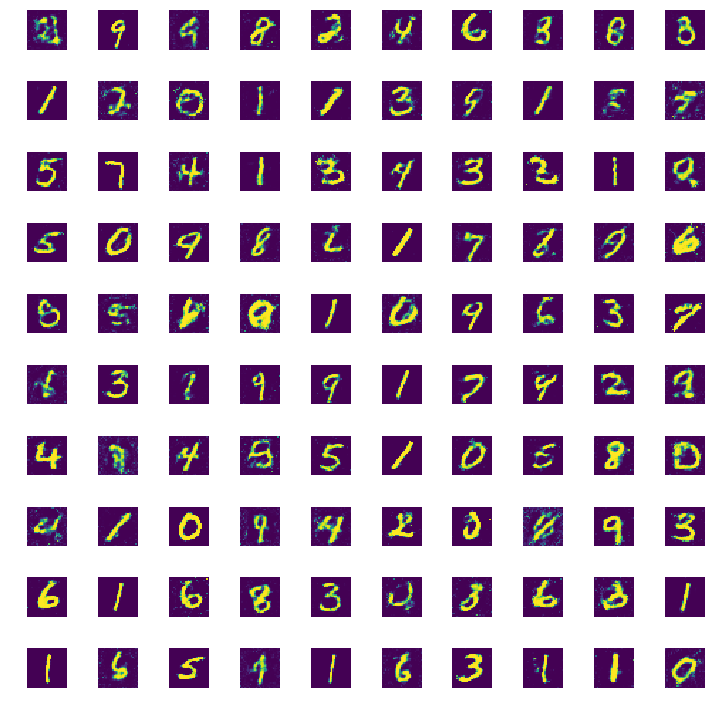

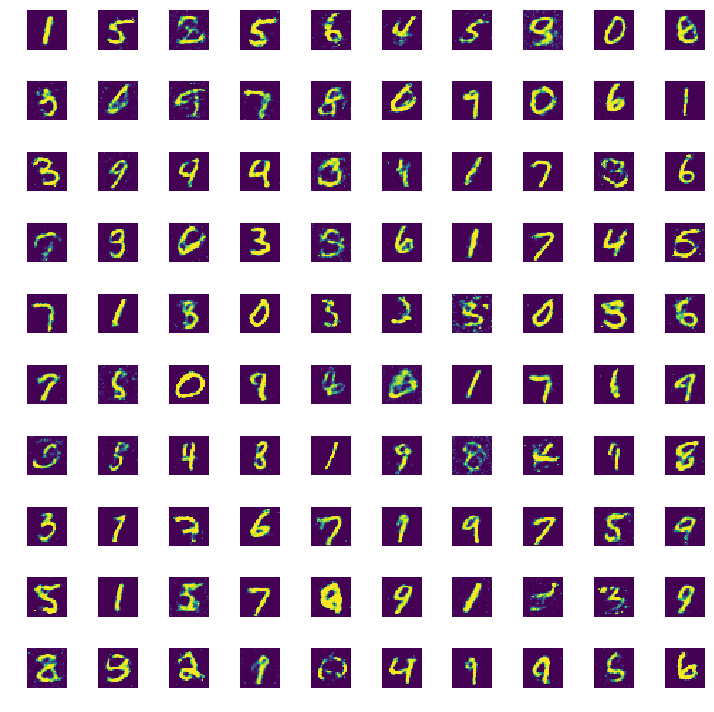

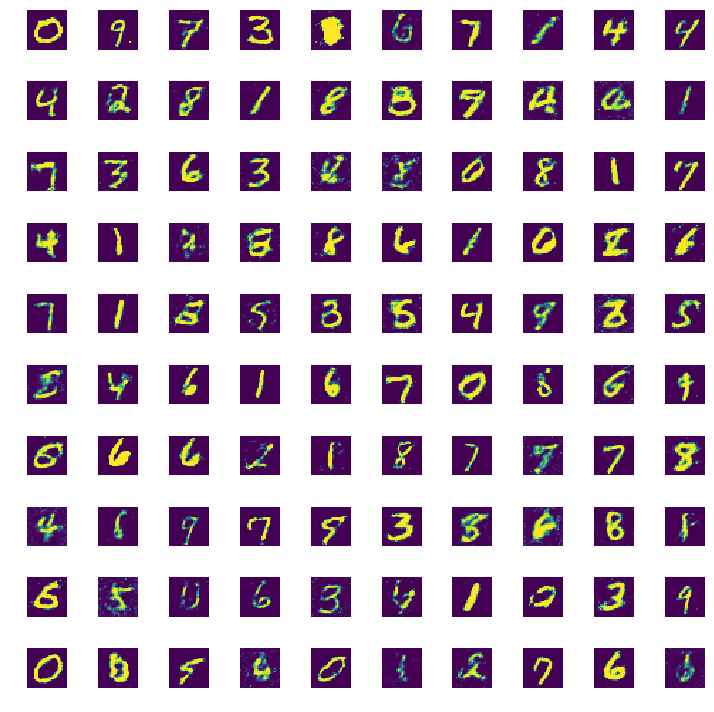

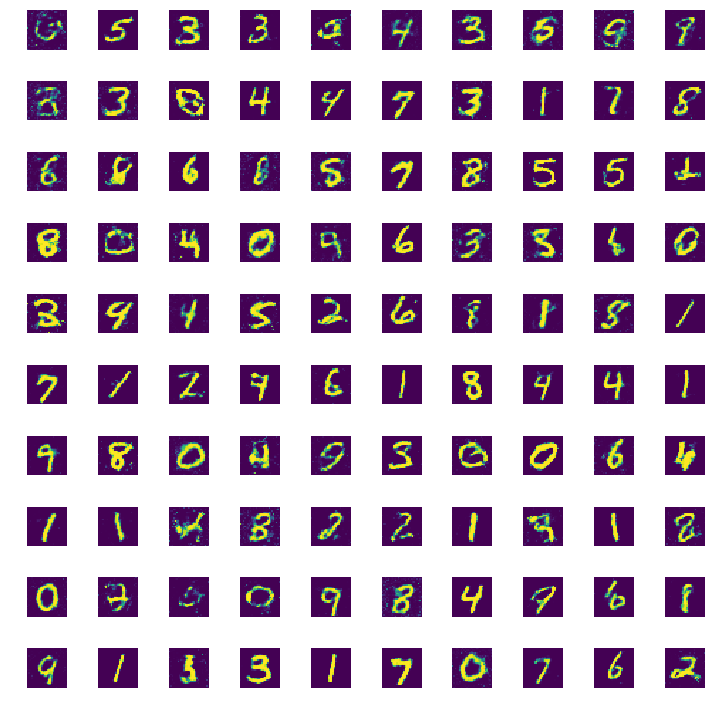

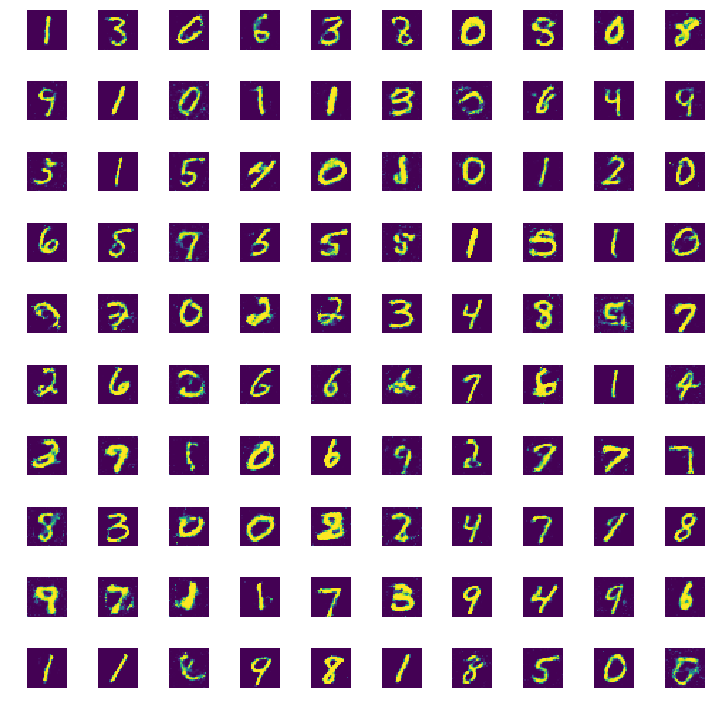

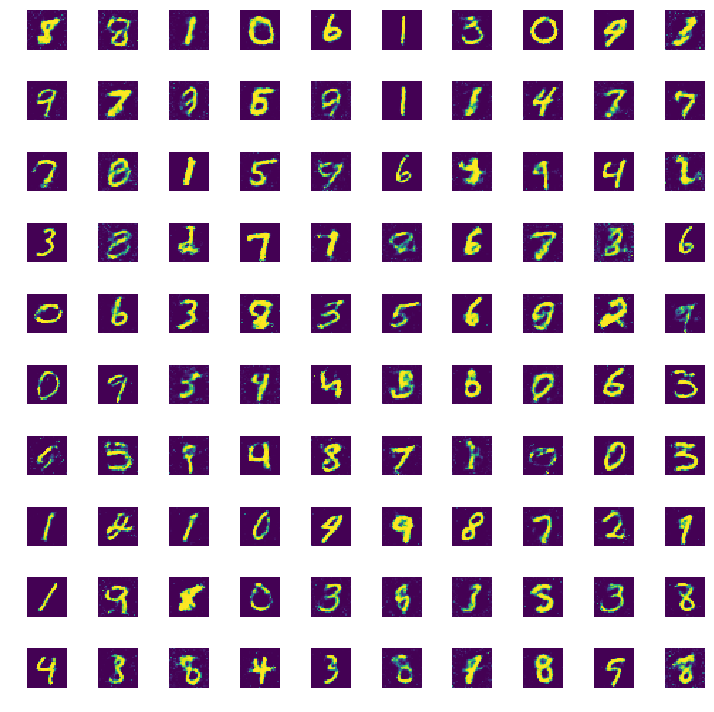

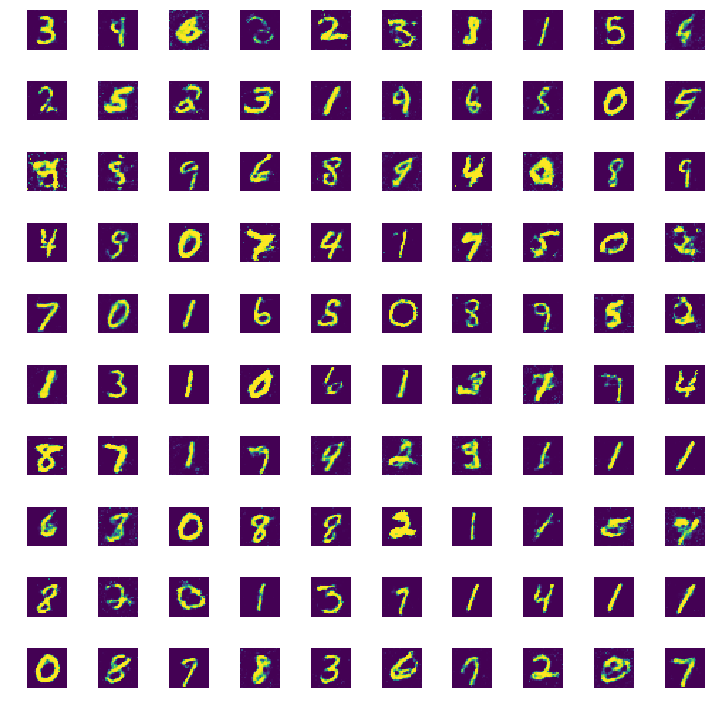

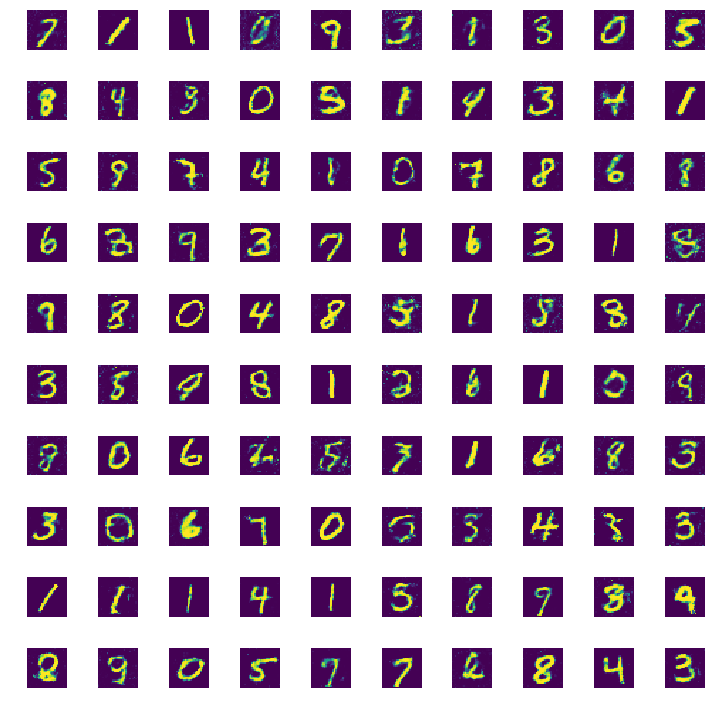

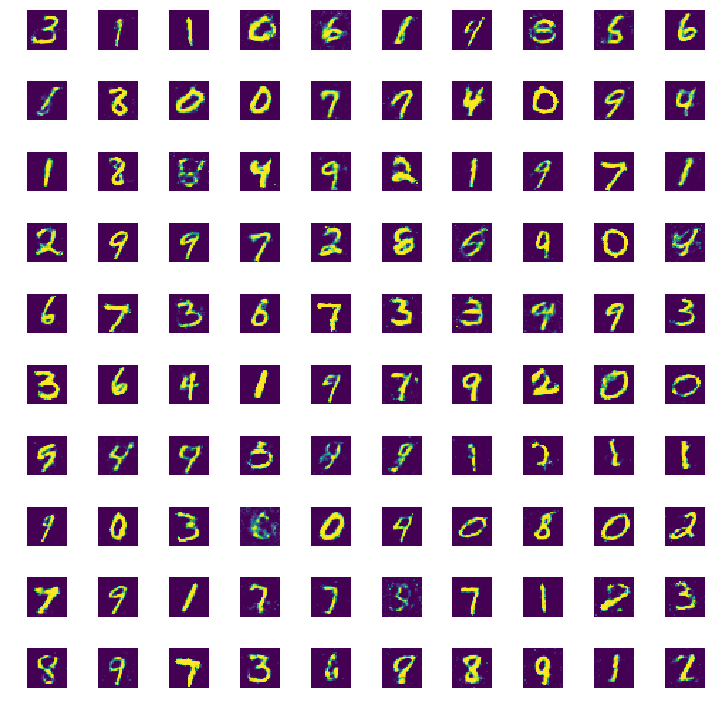

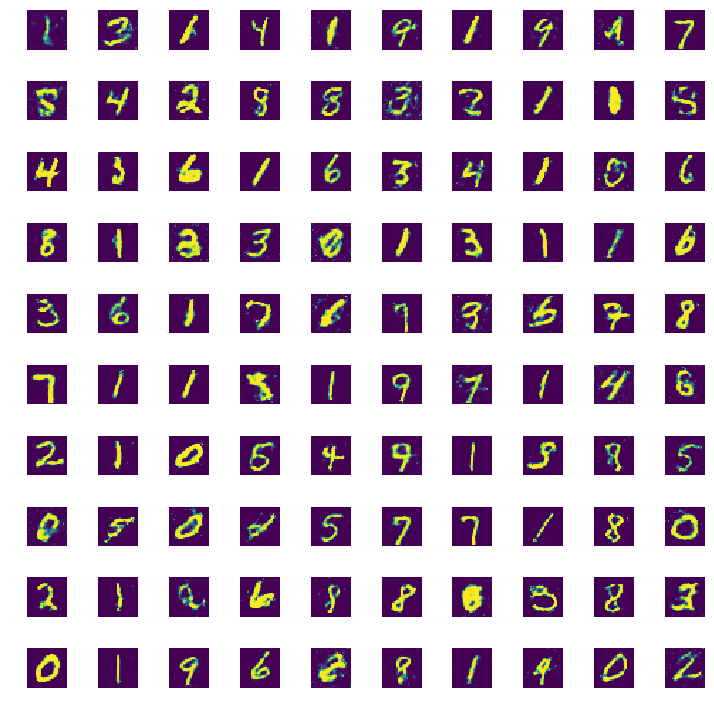

In [15]:
def training(epochs=1, batch_size=128):
    
    #Loading the data
    (X_train, y_train, X_test, y_test) = load_data()
    batch_count = X_train.shape[0] / batch_size
    
    # Creating GAN
    generator= create_generator()
    discriminator= create_discriminator()
    gan = create_gan(discriminator, generator)
    
    for e in range(1,epochs+1 ):
        print("Epoch %d" %e)
        for _ in tqdm(range(batch_size)):
        #generate  random noise as an input  to  initialize the  generator
            noise= np.random.normal(0,1, [batch_size, 100])
            
            # Generate fake MNIST images from noised input
            generated_images = generator.predict(noise)
            
            # Get a random set of  real images
            image_batch =X_train[np.random.randint(low=0,high=X_train.shape[0],size=batch_size)]
            
            #Construct different batches of  real and fake data 
            X= np.concatenate([image_batch, generated_images])
            
            # Labels for generated and real data
            y_dis=np.zeros(2*batch_size)
            y_dis[:batch_size]=0.9
            
            #Pre train discriminator on  fake and real data  before starting the gan. 
            discriminator.trainable=True
            discriminator.train_on_batch(X, y_dis)
            
            #Tricking the noised input of the Generator as real data
            noise= np.random.normal(0,1, [batch_size, 100])
            y_gen = np.ones(batch_size)
            
            # During the training of gan, 
            # the weights of discriminator should be fixed. 
            #We can enforce that by setting the trainable flag
            discriminator.trainable=False
            
            #training  the GAN by alternating the training of the Discriminator 
            #and training the chained GAN model with Discriminator’s weights freezed.
            gan.train_on_batch(noise, y_gen)
            
        if e == 1 or e % 20 == 0:
           
            plot_generated_images(e, generator)
training(400,128)